In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import xarray as xr

mask = xr.open_dataset("Data/Other/NW_masks.nc")
station_coords = pd.read_csv('Data/Other/stations_coordinates.csv')

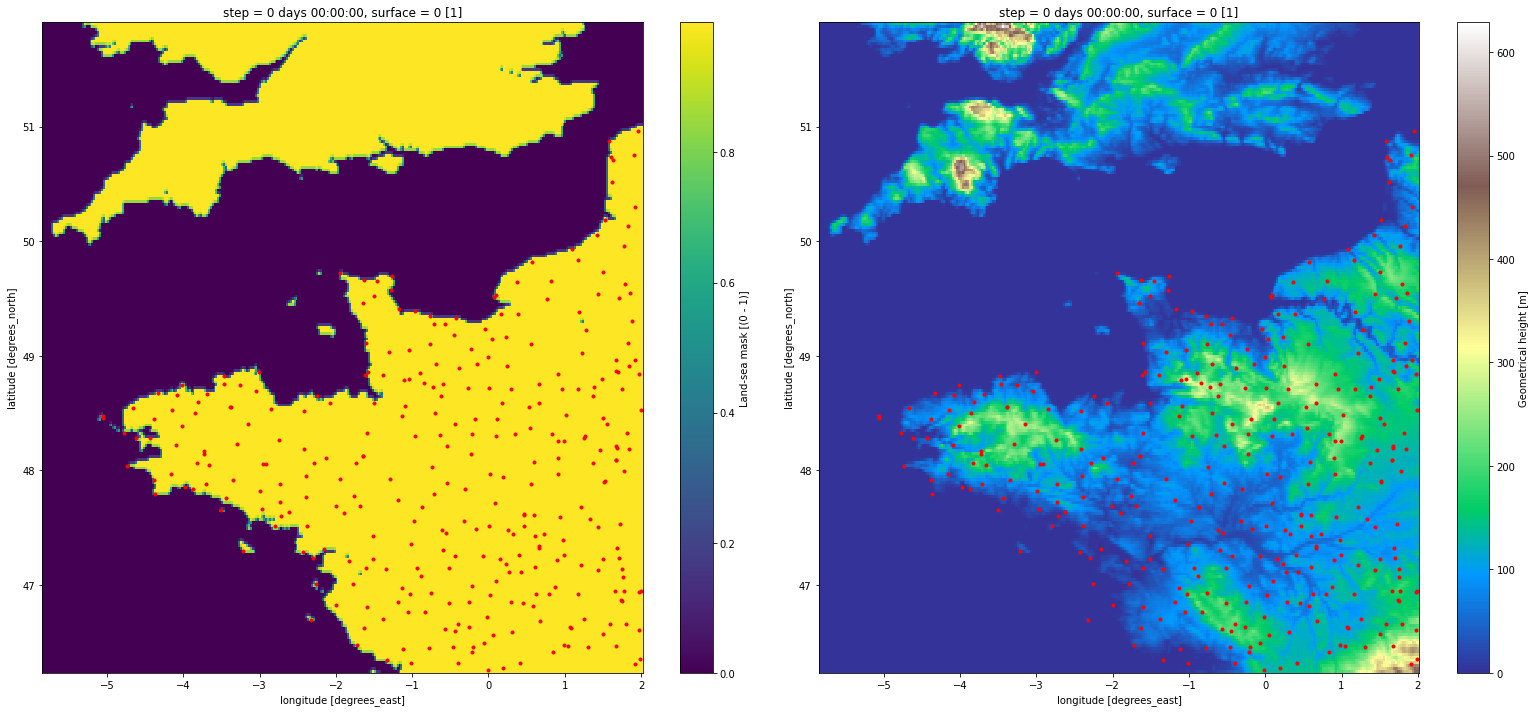

In [9]:
fig, ax = plt.subplots(1,2, figsize=(22, 10))

mask["lsm"].plot(ax=ax[0])
ax[0].plot(station_coords["lon"], station_coords["lat"], "r.")
vmin = mask["p3008"].values.min()
vmax = mask["p3008"].values.max()
mask["p3008"].plot(ax=ax[1], cmap="terrain", vmin=vmin, vmax=vmax)
ax[1].plot(station_coords["lon"], station_coords["lat"], "r.")
plt.tight_layout()
plt.show()

In [47]:
year = "2017"
date = "0101"
model = "arome"
data = xr.open_dataset(f"Data/Train/2D_{model}_{year}/2D_{model}_{year}{date}.nc")
# data = xr.open_dataset(f"Data/Train/2D_{model}_{year}/2D_{model}_{year}{date}.nc")

In [79]:
data#["ws"].sel(valid_time='2017-01-01T00:00:00.000000000')

<xarray.Dataset>
Dimensions:     (latitude: 227, longitude: 315, valid_time: 25, Id: 25)
Coordinates:
    time        datetime64[ns] 2017-01-01
  * latitude    (latitude) float32 51.9 51.87 51.85 51.82 ... 46.3 46.27 46.25
  * longitude   (longitude) float32 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008
  * valid_time  (valid_time) datetime64[ns] 2017-01-01 ... 2017-01-02
  * Id          (Id) object '365_0' '365_1' '365_2' ... '365_23' '365_24'
Data variables:
    ws          (valid_time, latitude, longitude) float32 11.58 11.6 ... 1.726
    p3031       (valid_time, latitude, longitude) float32 ...
    u10         (valid_time, latitude, longitude) float32 ...
    v10         (valid_time, latitude, longitude) float32 ...
    t2m         (valid_time, latitude, longitude) float32 ...
    d2m         (valid_time, latitude, longitude) float32 ...
    r           (valid_time, latitude, longitude) float32 ...
    tp          (valid_time, latitude, longitude) float32 ...
    msl         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2021-09-30T18:02:19 GRIB to CDM+CF via cfgrib-0....

In [78]:
for i in range(len(station_coords)):
    station = station_coords.iloc[i]
    station_lat, station_lon = station[["lat", "lon"]]
    window_size = 16 * 0.025
    min_lat = station_lat - window_size
    max_lat = station_lat + window_size
    min_lon = station_lon - window_size
    max_lon = station_lon + window_size

    mask_lon = (data.longitude >= min_lon) & (data.longitude <= max_lon)
    mask_lat = (data.latitude >= min_lat) & (data.latitude <= max_lat)

    print(data.where(mask_lon & mask_lat, drop=True)["ws"].shape)
    cropped = data.where(mask_lon & mask_lat, drop=True)

(25, 26, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 25, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 17)
(25, 32, 32)
(25, 32, 32)
(25, 32, 29)
(25, 32, 18)
(25, 32, 32)
(25, 32, 27)
(25, 25, 30)
(25, 30, 32)
(25, 32, 26)
(25, 32, 32)
(25, 32, 20)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 23)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 19, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 19, 20)
(25, 21, 17)
(25, 32, 32)
(25, 32, 32)
(25, 32, 33)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 32)
(25, 32, 30)
(25, 32, 30)
(25, 32, 32)

In [69]:
cropped["ws"].shape

(25, 40, 40)

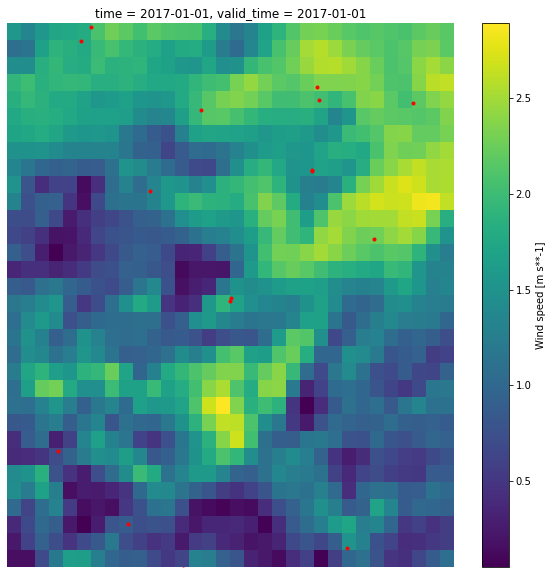

In [76]:
feature = "ws"
plt.figure(figsize=(10,10))
cropped["ws"].sel(valid_time='2017-01-01T00:00:00.000000000').plot(ax=plt.gca())
plt.plot(station_coords["lon"], station_coords["lat"], "r.")
plt.axis('off')
plt.show()

In [45]:
data#.loc[dict(latitude=slice(47, 50))]

<xarray.Dataset>
Dimensions:     (latitude: 58, longitude: 80, valid_time: 25)
Coordinates:
    time        datetime64[ns] 2016-01-01
  * latitude    (latitude) float32 51.9 51.8 51.7 51.6 ... 46.5 46.4 46.3 46.2
  * longitude   (longitude) float32 -5.842 -5.742 -5.642 ... 1.858 1.958 2.058
  * valid_time  (valid_time) datetime64[ns] 2016-01-01 ... 2016-01-02
Data variables:
    ws          (valid_time, latitude, longitude) float32 5.607 5.72 ... 7.309
    p3031       (valid_time, latitude, longitude) float32 ...
    u10         (valid_time, latitude, longitude) float32 ...
    v10         (valid_time, latitude, longitude) float32 ...
    t2m         (valid_time, latitude, longitude) float32 ...
    d2m         (valid_time, latitude, longitude) float32 ...
    r           (valid_time, latitude, longitude) float32 ...
    tp          (valid_time, latitude, longitude) float32 ...
    msl         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2021-09-29T11:06:41 GRIB to CDM+CF via cfgrib-0....

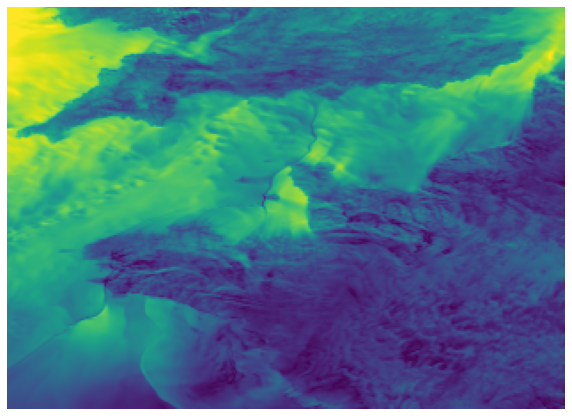

In [48]:
feature = ""
data["ws"].values.shape
plt.figure(figsize=(10,10))
I = plt.imshow(data["ws"].values[0])
plt.axis('off')
for i in range(24):
    I.set_data(data["ws"].values[i+1])
    plt.pause(.1)
plt.show()